# Mapeando el Universo



## Análisis y Visualización

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadísticamente diferentes.

índices de color sugeridos:
* u - g
* g - r
* r - i
* i - z

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [34]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = "dataset/dataset_short.csv"

In [4]:
df = pd.read_csv(filename,index_col=0)

In [5]:
df.index.max()

3341830154740590592

In [53]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.columns)

Index(['z', 'zErr', 'zWarning', 'subClass', 'velDisp', 'velDispErr', 'ra',
       'dec', 'raErr', 'decErr',
       ...
       'expPhi_u', 'expPhi_g', 'expPhi_r', 'expPhi_i', 'expPhi_z',
       'extinction_u', 'extinction_g', 'extinction_r', 'extinction_i',
       'extinction_z'],
      dtype='object', length=115)


In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

z                float64
zErr             float64
zWarning           int64
subClass          object
velDisp          float64
velDispErr       float64
ra               float64
dec              float64
raErr            float64
decErr           float64
modelMag_u       float64
modelMag_g       float64
modelMag_r       float64
modelMag_i       float64
modelMag_z       float64
modelMagErr_u    float64
modelMagErr_g    float64
modelMagErr_r    float64
modelMagErr_i    float64
modelMagErr_z    float64
petroMag_u       float64
petroMag_g       float64
petroMag_r       float64
petroMag_i       float64
petroMag_z       float64
petroMagErr_u    float64
petroMagErr_g    float64
petroMagErr_r    float64
petroMagErr_i    float64
petroMagErr_z    float64
petroRad_u       float64
petroRad_g       float64
petroRad_r       float64
petroRad_i       float64
petroRad_z       float64
petroRadErr_u    float64
petroRadErr_g    float64
petroRadErr_r    float64
petroRadErr_i    float64
petroRadErr_z    float64


In [52]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.describe())

                 z         zErr     zWarning      velDisp   velDispErr  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.106732     0.000021     0.016000   136.691611    14.852510   
std       0.054623     0.000013     0.466248    75.595506    19.427326   
min       0.010423     0.000003     0.000000     0.000000    -3.000000   
25%       0.066716     0.000011     0.000000    84.571003     9.171935   
50%       0.100656     0.000019     0.000000   131.921400    12.240650   
75%       0.138991     0.000028     0.000000   182.166950    16.379272   
max       0.746932     0.000305    16.000000   850.000000  1131.371000   

                ra          dec        raErr       decErr   modelMag_u  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    184.204791    25.125391     0.016671     0.016180    19.539480   
std      57.759337    18.694276     0.041910     0.033692     1.076405   
min       0.001718   -11.179560     0

In [56]:
VARS = ["z",
        "subClass",
        "velDisp",
        "ra",
        "dec",
        "modelMag_u",
        "modelMag_g",
        "modelMag_r",
        "modelMag_i",
        "modelMag_z",
        "petroMag_u",
        "petroMag_g",
        "petroMag_r",
        "petroMag_i",
        "petroMag_z",
        "petroRad_u",
        "petroRad_g",
        "petroRad_r",
        "petroRad_i",
        "petroRad_z",
        "petroR50_u",
        "petroR50_g",
        "petroR50_r",
        "petroR50_i",
        "petroR50_z",
        "petroR90_u",
        "petroR90_g",
        "petroR90_r",
        "petroR90_i",
        "petroR90_z",
        "deVRad_u",
        "deVRad_g",
        "deVRad_r",
        "deVRad_i",
        "deVRad_z",
        "deVAB_u",
        "deVAB_g",
        "deVAB_r",
        "deVAB_i",
        "deVAB_z",
        "deVPhi_u",
        "deVPhi_g",
        "deVPhi_r",
        "deVPhi_i",
        "deVPhi_z",
        "expRad_u",
        "expRad_g",
        "expRad_r",
        "expRad_i",
        "expRad_z",
        "expAB_u",
        "expAB_g",
        "expAB_r",
        "expAB_i",
        "expAB_z",
        "expPhi_u",
        "expPhi_g",
        "expPhi_r",
        "expPhi_i",
        "expPhi_z",
        "extinction_u",
        "extinction_g",
        "extinction_r",
        "extinction_i",
        "extinction_z"]

In [57]:
df = df[VARS]

In [68]:
df['modelColor_ug'] = df['modelMag_u'] - df['modelMag_g']
df['modelColor_gr'] = df['modelMag_g'] - df['modelMag_r']
df['modelColor_ri'] = df['modelMag_r'] - df['modelMag_i']
df['modelColor_iz'] = df['modelMag_i'] - df['modelMag_z']
df['petroColor_ug'] = df['petroMag_u'] - df['petroMag_g']
df['petroColor_gr'] = df['petroMag_g'] - df['petroMag_r']
df['petroColor_ri'] = df['petroMag_r'] - df['petroMag_i']
df['petroColor_iz'] = df['petroMag_i'] - df['petroMag_z']

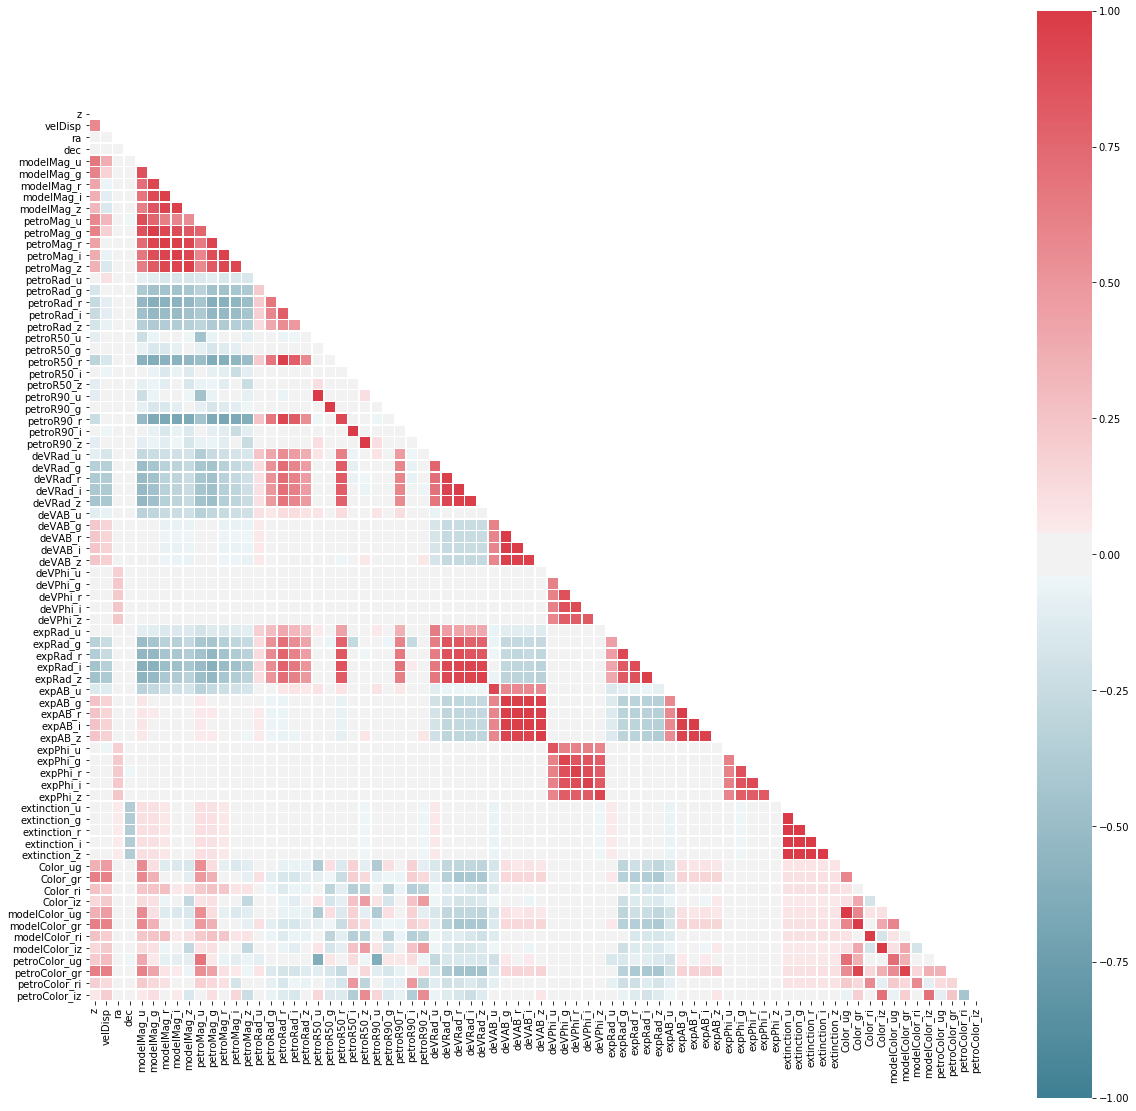

In [69]:

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, vmax=1.0,vmin=-1.0,linewidths=.5)

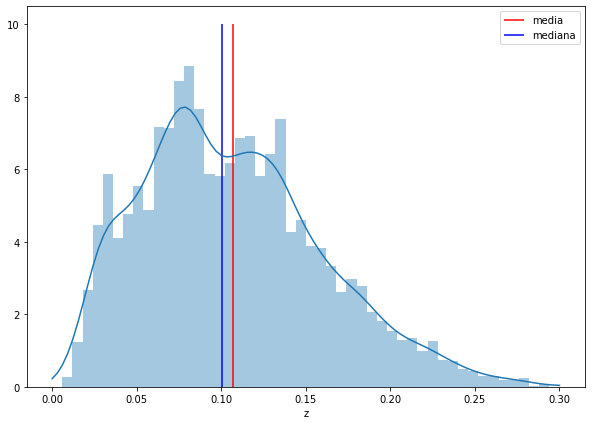

In [120]:
plt.figure(figsize=(10,7))

range = [0.0,0.3]
sns.distplot(df['z'],kde_kws={'clip':range},hist_kws={'range':range})
plt.vlines(df['z'].mean(),0.0,10.0,'r',label='media')
plt.vlines(df['z'].median(),0.0,10.0,'b',label='mediana')
plt.legend()

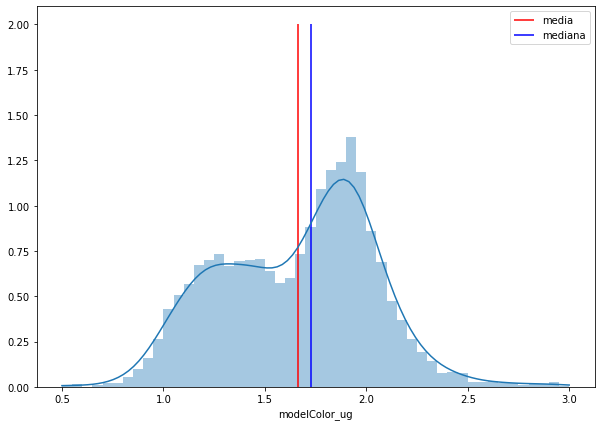

In [119]:
plt.figure(figsize=(10,7))

range = [0.5,3.0]
sns.distplot(df['modelColor_ug'],kde_kws={'clip':range},hist_kws={'range':range})

var = df['modelColor_ug'].clip(0.5,3.0)
plt.vlines(var.mean(),0.0,2.0,'r',label='media')
plt.vlines(var.median(),0.0,2.0,'b',label='mediana')
plt.legend()

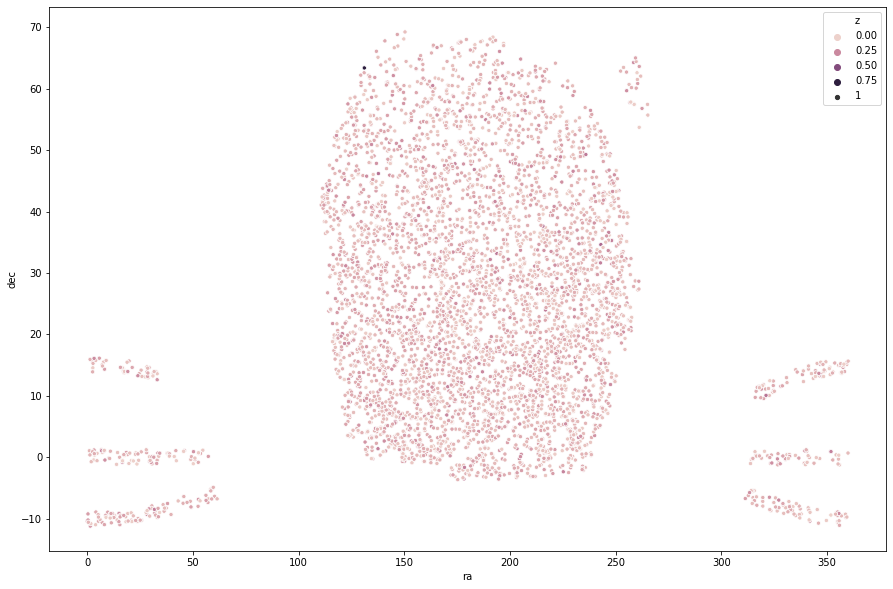

In [67]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

sns.scatterplot(x='ra',y='dec',data=df,hue='z',size=1,ax=ax)

plt.show()

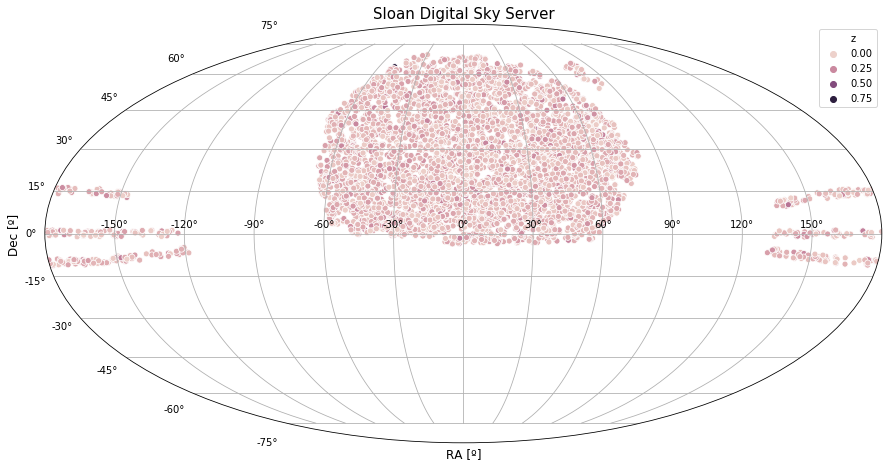

In [48]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111,projection="mollweide")

sns.scatterplot(x=np.radians(df['ra'])-np.pi,y=np.radians(df['dec']),data=df,hue='z',ax=ax)
plt.grid(True)

ax.set_title('Sloan Digital Sky Server')
ax.title.set_fontsize(15)
ax.set_xlabel("RA [º]")
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel("Dec [º]")
ax.yaxis.label.set_fontsize(12)

plt.show()


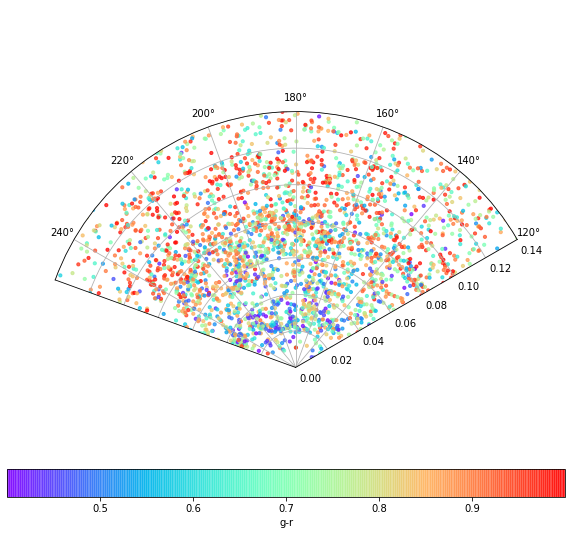

In [167]:
indx = (df['z'] < 0.3) & (df['modelColor_gr'] > 0.4) & (df['modelColor_gr'] < 1.0)

r = df['z'][indx]
theta = df['ra'][indx]
colors = df['modelColor_gr'][indx]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(np.radians(theta), r, c=colors, s=10,cmap='rainbow', alpha=0.75)

ax.set_ylim(0.0,0.14)
ax.set_thetamin(120)
ax.set_thetamax(250)
ax.set_rorigin(0.0)
ax.set_theta_zero_location('S', offset=0)

plt.colorbar(c,ax=ax,orientation='horizontal',pad=0.0,label='g-r')
plt.show()

Aquí otro ejemplo de una visualización que pueden realizar
![Sloan Great Wall](images/greatWall.jpg)

### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [106]:
filename = 'dataset/dataset_short_zoo.csv'

In [107]:
zoo = pd.read_csv(filename,index_col=0)

In [108]:
dd = df.join(zoo)

In [109]:
dd.describe()

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz,spiral,elliptical,uncertain
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.106732,136.691611,184.204791,25.125391,19.539480,17.865688,17.003690,16.587586,16.296121,19.532993,...,0.861998,0.416104,0.291464,1.621112,0.838083,0.392417,0.243401,0.28880,0.099800,0.611400
std,0.054623,75.595506,57.759337,18.694276,1.076405,0.889152,0.833127,0.802036,0.835239,1.216530,...,0.317552,0.189060,0.224183,0.777162,0.305624,0.226851,0.314662,0.45325,0.299763,0.487481
min,0.010423,0.000000,0.001718,-11.179560,15.335180,13.552930,12.582880,12.057380,11.685680,15.289530,...,-5.642810,-3.172070,-6.301100,-6.913450,-6.157660,-10.833440,-9.160190,0.00000,0.000000,0.000000
25%,0.066716,84.571003,150.622355,10.275177,18.939248,17.445967,16.646715,16.237758,15.924990,18.896915,...,0.684655,0.376722,0.251500,1.244755,0.649635,0.354535,0.187820,0.00000,0.000000,0.000000
50%,0.100656,131.921400,184.413855,23.384139,19.595610,18.030080,17.217290,16.794405,16.488565,19.527000,...,0.878720,0.424330,0.314960,1.539845,0.847500,0.406400,0.270980,0.00000,0.000000,1.000000
75%,0.138991,182.166950,219.592476,39.191761,20.245438,18.451570,17.551113,17.123818,16.822332,20.155358,...,1.034527,0.467097,0.355032,1.817260,1.006263,0.449853,0.326592,1.00000,0.000000,1.000000
max,0.746932,850.000000,359.995051,69.241324,28.112870,25.279500,28.188420,23.823350,26.185740,33.636780,...,6.407680,7.526770,4.397010,16.659360,6.369250,6.933700,10.373380,1.00000,1.000000,1.000000


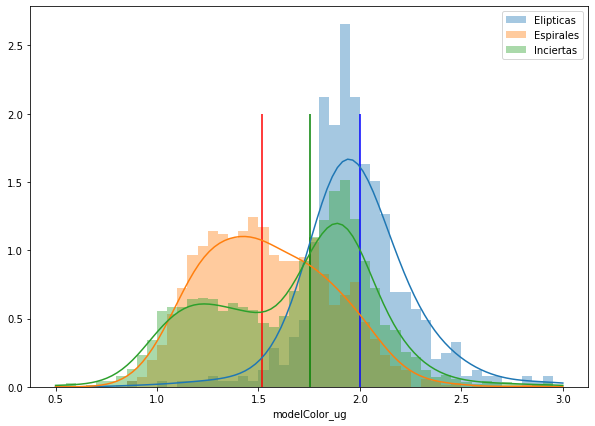

In [121]:
plt.figure(figsize=(10,7))

range = [0.5,3.0]
elipticas = dd['elliptical'] == 1
sns.distplot(dd['modelColor_ug'][elipticas],kde_kws={'clip':range},hist_kws={'range':range},label='Elipticas')

espirales = dd['spiral'] == 1
sns.distplot(dd['modelColor_ug'][espirales],kde_kws={'clip':range},hist_kws={'range':range},label='Espirales')

irregulares = dd['uncertain'] == 1
sns.distplot(dd['modelColor_ug'][irregulares],kde_kws={'clip':range},hist_kws={'range':range},label='Inciertas')

var = dd['modelColor_ug'][elipticas].clip(0.5,3.0)
plt.vlines(var.mean(),0.0,2.0,'b')

var = dd['modelColor_ug'][espirales].clip(0.5,3.0)
plt.vlines(var.median(),0.0,2.0,'r')

var = dd['modelColor_ug'][irregulares].clip(0.5,3.0)
plt.vlines(var.median(),0.0,2.0,'g')
plt.legend()